In [1]:
###
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Pregatire datelor: descarcare, extragere, preprocesarea si organizarea setului de date

In [2]:
#Download historical Bitcoin data
bitcoin_data = yf.download('BTC-USD', start='2023-11-23', end='2024-11-22')

#etract the closing prices as the target variable
bitcoin_prices=bitcoin_data['Close'].values

#create a future matrix with consecutive numbers as features
X = np.arange(len(bitcoin_prices)).reshape(-1,1)

#split the data into trainig and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, bitcoin_prices, test_size = 0.2, random_state = 42)

[*********************100%***********************]  1 of 1 completed


Crearea si antrenarea modelului

In [3]:
# Craete and train a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

Rularea Modelului: Infeenta - predictie si evaluare

In [4]:
# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Evluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on Test Set: {mse_test}')

Mean Squared Error on Test Set: 2646648.916147106


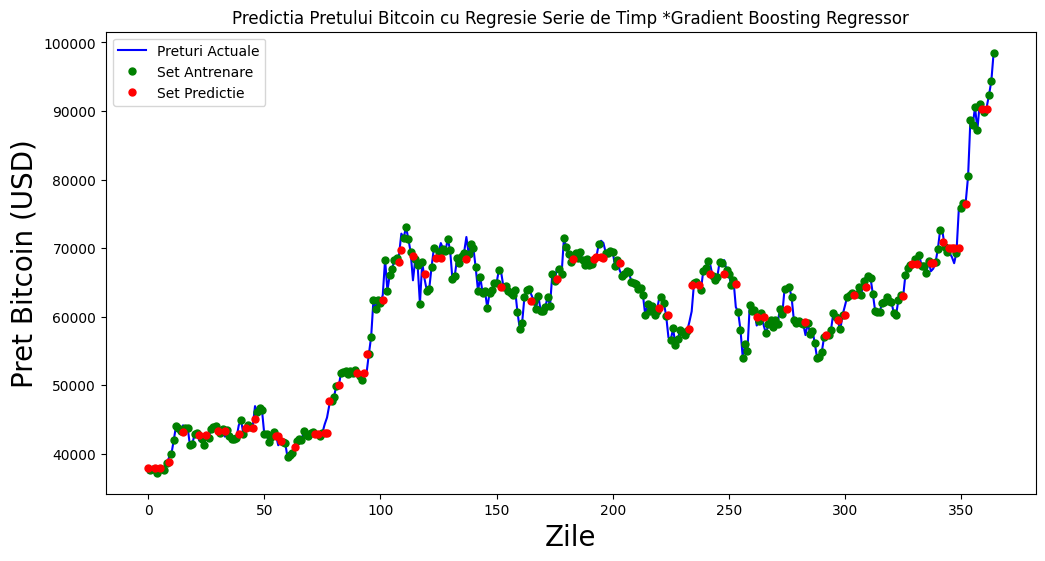

In [7]:
# Plot the actual prices
plt.figure(figsize=(12,6))
plt.plot(X, bitcoin_prices, label='Preturi Actuale', color='blue')

# Plot the training set points and predicted values
plt.plot(X_train, y_train, 'go', label = 'Set Antrenare', markersize = 5)
plt.plot(X_test, y_pred_test, 'ro', label = 'Set Predictie', markersize = 5)

# Set labels and title
plt.xlabel('Zile', fontsize=20)
plt.ylabel('Pret Bitcoin (USD)', fontsize = 20)
plt.title('Predictia Pretului Bitcoin cu Regresie Serie de Timp *Gradient Boosting Regressor')
plt.legend()
plt.show()